### 순서가 상관 없는 문자 데이터를 처리할 때면 ? 

어떤 문장의 **주제** 정도만 알고 싶다면, 순서가 상관없을 수도 있음

사람의 입장에서 생각해볼 때 예를 들어 "읽었다 재밌어서 그 책을 하루종일" 대충 책에 대한 얘기를 하는구나~ 정도 이해할 수 있듯이 말이다. 

이렇게 순서가 상관 없는 문장을 표현하는 방법으론 이런 것들이 있다.

#### Bag of Words (BoW)

문장의 단어의 one-hot-vector 을 합하면 BoW이 된다. 

여기서 one-hot-vector란, 단어 한개를 한 개의 column vector로 표현한 것이다. 모든 dataset에 등장하는 unique vocab을 뽑고 각 단어마다 하나의 column vector 로 만든 것. 

결국 BoW vector는 Nx1 매트릭스에 문장 안에 포함되어 있는 단어가 몇 번 들어가있는지 빈도수 (frequency)를 표시하는 것이다.

그리고 BoW는 순서를 고려하지 않는다. 그저 frequency만 고려될 뿐... 🤪

#### N-Gram

연속된 n개의 단어 뭉치를 의미한다. 예를 들어 [I, love, mongsil]을 bigram으로 표현한다면 [I love, love mongsil] 이 된다. 

bi-gram까지 고려하면 [I, love, mongsil, I love, love monsil] 로 vocabulary가 늘어나게 된다.

downside는 당연히 데이터 문장이 늘어나게 되면 vocabulary 사이즈가 미친듯이 늘어나게 된다. 



근데 순서 상관이 없어도 좀 더 중요한 데이터가 있지 않을까?

## term frequency - inverse document frequency(tf-idf)

단어 간 빈도수에 따라 중요도를 계산하여 고려하는 방법

- term frequency (tf) : 현재 문서(문장)에서의 단어의 빈도수

- document frequency (df): 이 단어가 나오는 문서(문장) 총 개수

조사나 관사는 tf, df 둘다 높다. 하지만 "스포츠", "펭수" 같은 것은 tf가 df보단 상대적으로 높을 것이다. 

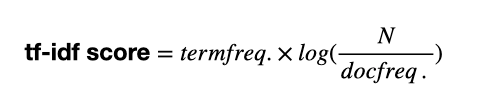

tf 를 비례하여 계산하되 다른 문서에서도 너무 많이 나오는 것은 중요도를 낮추어 계산한다. 😎 (조사일 가능성이 높기 때문)

tf-idf vector는 Nx1 vector 모양의 BoW vector에서 tf 점수를 idf로 normalize 한 것


단점은 뭘까? 

1) Data 가 커질수록 (=문장이 길어지고 많아질수록) vocabulary 가 계속해서 증가..

2) 단어와 단어 사이의 유사성을 수학적으로 파악할 수 없음. one-hot-vector 끼리의 내적은 아무리 해도 0

3) 당연히 순서 중요한 문제에는 못 씀

In [1]:
!pip install nltk

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [6]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt


      Unzipping tokenizers/punkt.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 5.7 MB/s eta 0:00:01    |█                               | 655 kB 813 kB/s eta 0:00:24     |████▌                           | 2.7 MB 1.5 MB/s eta 0:00:12     |██████▋                         | 4.0 MB 1.5 MB/s eta 0:00:11     |████████████████████            | 12.1 MB 6.2 MB/s eta 0:00:02     |█████████████████████▌          | 13.1 MB 6.2 MB/s eta 0:00:02     |██████████████████████▌         | 13.6 MB 6.2 MB/s eta 0:00:01     |███████████████████████████████▎| 19.0 MB 5.7 MB/s eta 0:00:01     |████████████████████████████████| 19.4 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 5.4 MB/s eta 0:00:01     |██████████▊                     | 1.2 MB 5.4 MB/s eta 0:00:01     |████████████████████████▋       | 2.8 MB 5.4 MB/s eta 0:00:01     |███████████████████████████     | 3.0 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 5.5 MB 2.6 MB/

In [4]:
import konlpy
konlpy.__version__

'0.5.2'

In [7]:
from nltk.tokenize import word_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D. student."
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


## 단어의 관계를 고려해보자 : word embedding 

### Distributional Hypothesis 단어는 주변 단어들에 의해 정리된다

### Word Embedding (word vector)란?

임베딩은 고차원 벡터의 변환을 통해 생성할 수 있는 상대적인 저차원 공간 

임베딩을 사용하면 단어를 나타내는 희소 벡터와 같이 커다란 입력값에 대해 머신러닝을 더 쉽게 수행할 수 있다


### Glove 

**SVD** 알고리즘을 사용하여 차원을 축소해 압축해 버림. 

### neural net을 이용한 word2vec



## Reference

- https://wikidocs.net/50698

- https://jiho-ml.com/weekly-nlp-2/